In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import LogNorm


Bad key "text.kerning_factor" on line 4 in
/usr/lib64/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("data/BlackForestStone_clusters.csv.gz")

# show distributions of variables
display(df)

,x_mean,y_mean,n_pix,energy,var_mx,var_mn,angle
0,4.00,72.50,14,487.0,4.73,0.92,-0.98
1,14.00,168.50,2,10.0,0.00,0.00,0.00
2,26.86,235.86,7,337.0,1.64,0.31,-0.91
3,62.44,165.00,9,197.0,5.14,0.14,-0.81
4,94.60,128.40,15,2752.0,1.43,1.09,-0.79
...,...,...,...,...,...,...,...
19634,53.80,4.60,5,160.0,0.75,0.25,-1.25
19635,148.50,186.50,4,65.0,0.33,0.33,0.00
19636,193.82,190.55,11,374.0,4.15,0.29,0.27
19637,233.50,208.50,4,116.0,0.33,0.33,0.00


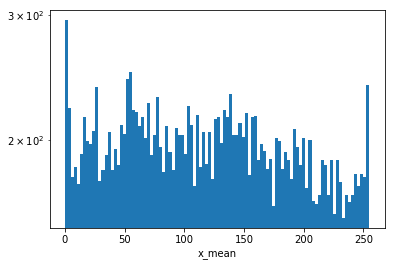

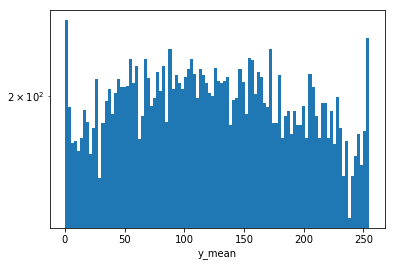

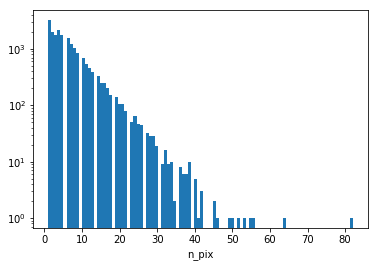

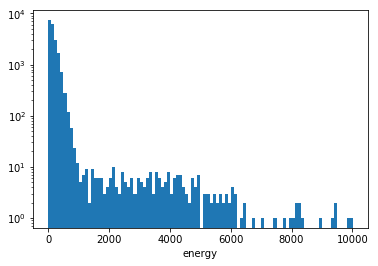

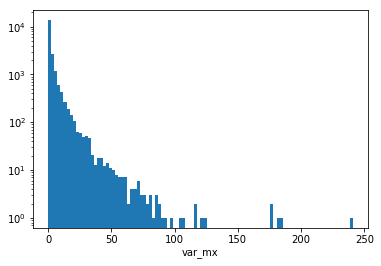

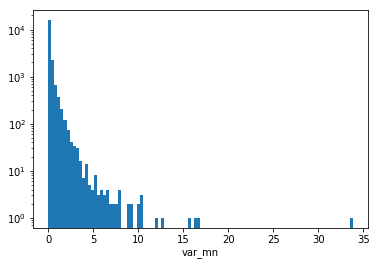

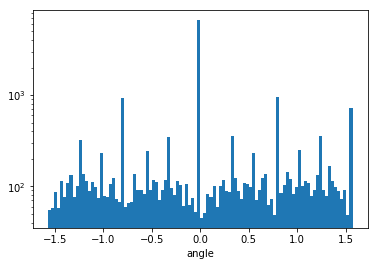

In [3]:
def plt_keys(df):
    for key in df.keys():
        _ = plt.hist(df[key][df[key] != np.nan], bins=100)
        plt.yscale("log")
        plt.xlabel(key)
        plt.show()

plt_keys(df)

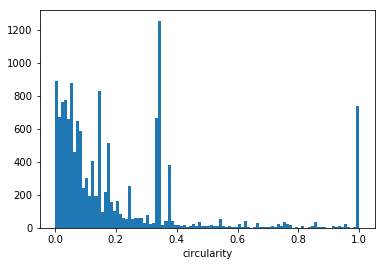

In [4]:
df['circularity'] = df['var_mn']/df['var_mx']

is_ge_0 = df['circularity'] >= 0.
_ = plt.hist(df['circularity'][is_ge_0], bins=100)

#_ = plt.hist(df['circularity'], bins=100)
plt.xlabel("circularity")
plt.show()


In [ ]:
_ = plt.hist2d(df['x_mean'], df['y_mean'], bins=(256, 256), norm=LogNorm())
plt.show()

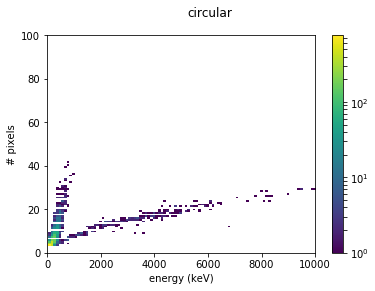

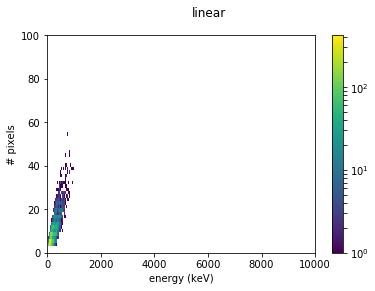

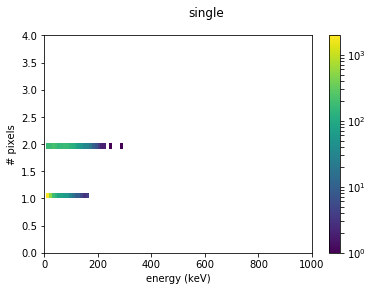

In [7]:
is_circular = df['circularity'] >= 0.2
is_linear = df['circularity'] < 0.2
is_single = df['n_pix'] <= 2

_ = plt.hist2d(df['energy'][is_circular], df['n_pix'][is_circular], bins = (100,50), norm=LogNorm())
plt.xlim(0,10000)
plt.ylim(0,100)
plt.suptitle("circular")
plt.colorbar()
plt.xlabel("energy (keV)")
plt.ylabel("# pixels")
plt.show()

_ = plt.hist2d(df['energy'][is_linear], df['n_pix'][is_linear], bins = (100,50), norm=LogNorm())
plt.xlim(0,10000)
plt.ylim(0,100)
plt.suptitle("linear")
plt.colorbar()
plt.xlabel("energy (keV)")
plt.ylabel("# pixels")
plt.show()

_ = plt.hist2d(df['energy'][is_single], df['n_pix'][is_single], bins = (100,10), norm=LogNorm()) 
plt.xlim(0,1000)
plt.ylim(0, 4)
plt.suptitle("single")
plt.colorbar()
plt.xlabel("energy (keV)")
plt.ylabel("# pixels")
plt.show()
